# Gender Recognition in a Medical Dataset with Missing Values -CS 220 -Fall 2018 - Sakaa Alsaedi  

All experiments were run on Python 3.6 on Windows 10 Pro with processor i7-6500U and 8 GB memory. The following table contains the tools and programming language that were used to implement software for solving the data cleaning problem and the purpose of their use. 

## Lib. are used 



In [1]:
# conventional way to import pandas
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score as acc
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.svm import SVC 
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer
import pylab as pl
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# DF TO EXCEL
from pandas import ExcelWriter
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from pandas import ExcelWriter

## Read a Given Medical Dataset 



In [2]:
# read CSV file from the 'data' subdirectory using a relative path
Dataset= pd.read_csv('C:\\Users\\Admin\\Desktop\\CS3123\\Data_Set\\Dataset.csv')

# display the first 5 rows
Dataset.head()

,0,0.1,1,2,3,4,5,6,7,8,...,436,437,438,439,440,441,442,443,444,445
0,1.204940e+12,1,79,1.0,4597,73.0,164.0,NaN,-1,-1,...,-1.0,-1.0,-1.0,20.0,NaN,1.0,40.0,-1.0,-1.0,-1.0
1,1.407940e+12,2,76,0.0,4595,74.0,172.0,NaN,1,-1,...,-1.0,-1.0,-1.0,20.0,NaN,1.0,55.0,-1.0,-1.0,-1.0
2,2.112950e+12,3,72,1.0,4602,NaN,NaN,NaN,1,1,...,-1.0,-1.0,-1.0,NaN,NaN,1.0,72.0,-1.0,-1.0,-1.0
3,4.129550e+11,4,63,1.0,4600,75.0,168.0,NaN,-1,-1,...,-1.0,-1.0,-1.0,20.0,NaN,1.0,55.0,-1.0,-1.0,-1.0
4,2.307940e+12,5,80,0.0,4679,85.0,187.0,NaN,-1,-1,...,-1.0,-1.0,-1.0,NaN,NaN,1.0,27.0,-1.0,-1.0,-1.0


## Data Cleaning



In [3]:
# Drop index and unnessery featuer 
Dataset.drop(['0', '0.1','3','187'], axis=1,inplace=True)

In [4]:
#Drop all features except (Age - gender -Height -weight)
#subset=Dataset.drop(Dataset.columns.to_series()["6":"445"], axis=1)
subset=Dataset

In [70]:
#subset.isna().sum()

In [72]:
# Drop sample that has missing value in Gender feater (to do a supervised ML)
H_Data=subset.drop(subset.index[1319])

H_Data.shape

(2771, 433)

In [8]:
#removing outliers
H_Data = H_Data[(H_Data['1']> 0)]
H_Data= H_Data[(H_Data['1']<100)]



In [10]:
#Removing outliers from Hight
Data = H_Data[(H_Data['5']> 145)]
Data = H_Data[(H_Data['5']<195)]

In [12]:
#Removing outliers from Weight
Data = Data[(Data['4']> 38)]
Data = Data[(Data['4']<250)]

In [14]:
Data_BN=Data.dropna(axis='columns')

In [16]:
# Female subset
F_Data=Data_BN[Data_BN['2'] == 0.0]
#Male subset
M_Data=Data_BN[Data_BN['2'] == 1.0]

In [19]:
BF_Data=F_Data.sample(943, random_state=0)

In [20]:
frames = [M_Data, BF_Data]

In [21]:
MF_Data = pd.concat(frames)

In [50]:
# select a Series from the DataFrame
y = MF_Data['2']
TT=MF_Data.drop(['2'],axis=1)
X=TT[:]

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]




# Splitting Data

In [24]:
X_train, X_test, y_train, y_test = train_test_split( X,y,test_size=0.25,random_state=42)

y_train = y_train.ravel()
y_test = y_test.ravel()

print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (1414, 58) (1414,)
Testing dataset shape: (472, 58) (472,)


# #  Feature selection_ with 5-fold CV Logistic Regression

In [25]:
### Build RF classifier to use in feature selection
logreg = LogisticRegression()
# Build step forward feature selection
sfs_LR = sfs(logreg,
           k_features=48,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

# Perform SFFS
sfs_LR = sfs_LR.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:    0.9s finished

[2018-12-12 00:18:28] Features: 1/48 -- score: 0.7652106357917952[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:    0.7s finished

[2018-12-12 00:18:29] Features: 2/48 -- score: 0.7878329950129064[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:    0.7s finished

[2018-12-12 00:18:29] Features: 3/48 -- score: 0.7913715760719745[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.7s finished

[2018-12-12 00:18:30] Features: 4/48 -- score: 0.793494223491968[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    0

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    1.9s finished

[2018-12-12 00:19:35] Features: 39/48 -- score: 0.7715785780517755[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    2.0s finished

[2018-12-12 00:19:37] Features: 40/48 -- score: 0.7722777736009824[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    1.8s finished

[2018-12-12 00:19:39] Features: 41/48 -- score: 0.7708643460391449[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    1.7s finished

[2018-12-12 00:19:41] Features: 42/48 -- score: 0.7694509184773074[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    1.7s finished

[2018-12-12 00:19:43] Features: 43/48 -- score: 0.76945091847

In [26]:
# Which features?
feat_cols = list(sfs_LR.k_feature_idx_)
print(feat_cols)

[0, 2, 3, 4, 7, 8, 11, 12, 14, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57]


# Classification

# Build ML model with best K Features


# Logistic Regression

In [27]:
# Build full model with selected features
clf =LogisticRegression()
clf.fit(X_train.iloc[:, feat_cols], y_train)

y_train_pred = clf.predict(X_train.iloc[:, feat_cols])
print('Training accuracy on selected features: %.3f' % acc(y_train, y_train_pred))

y_test_pred = clf.predict(X_test.iloc[:, feat_cols])
print('Testing accuracy on selected features: %.3f' % acc(y_test, y_test_pred))



Training accuracy on selected features: 0.786
Testing accuracy on selected features: 0.769


In [28]:
# Build full model with all features
clf =LogisticRegression()
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
print('Training accuracy on selected features: %.3f' % acc(y_train, y_train_pred))

y_test_pred = clf.predict(X_test)
print('Testing accuracy on selected features: %.3f' % acc(y_test, y_test_pred))


Training accuracy on selected features: 0.776
Testing accuracy on selected features: 0.744


Accuracy 0.7436440677966102


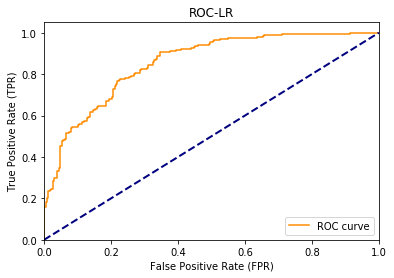

In [81]:
y_pred_LR =clf.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test, y_pred_LR))

y_pred_proba_lr = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_lr)
auc = metrics.roc_auc_score(y_test, y_pred_proba_lr)


plt.plot(fpr,tpr, color='darkorange', label='ROC curve')
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-LR')
plt.legend(loc="lower right")
plt.show()

#  Decision Tree  with  28 FS

In [29]:
#10-fold cross-validation with Decision Tree
DT = DecisionTreeClassifier()
DT.fit(X_train.iloc[:, feat_cols], y_train)

y_train_pred = DT.predict(X_train.iloc[:, feat_cols])
print('Training accuracy on selected features: %.3f' % acc(y_train, y_train_pred))

y_test_pred = DT.predict(X_test.iloc[:, feat_cols])
print('Testing accuracy on selected features: %.3f' % acc(y_test, y_test_pred))

Training accuracy on selected features: 1.000
Testing accuracy on selected features: 0.722


In [30]:
# Build full model with all features
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

y_train_pred = DT.predict(X_train)
print('Training accuracy on selected features: %.3f' % acc(y_train, y_train_pred))

y_test_pred = DT.predict(X_test)
print('Testing accuracy on selected features: %.3f' % acc(y_test, y_test_pred))

Training accuracy on selected features: 1.000
Testing accuracy on selected features: 0.758


In [76]:
y_pred_DT = DT.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test, y_pred_DT))

y_pred_proba_DT = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_DT)
auc = metrics.roc_auc_score(y_test, y_pred_proba_DT)


Accuracy 0.7584745762711864


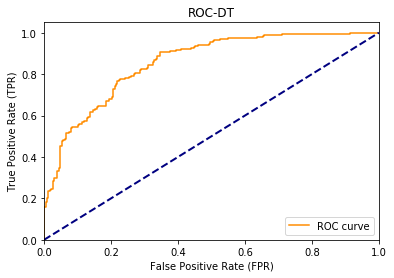

In [75]:


plt.plot(fpr,tpr, color='darkorange', label='ROC curve')
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-DT')
plt.legend(loc="lower right")
plt.show()

# SVM with 28 FS

In [31]:

# Build full model with selected features

SVM= SVC(kernel='linear') 
SVM.fit(X_train.iloc[:, feat_cols], y_train)

y_train_pred = SVM.predict(X_train.iloc[:, feat_cols])
print('Training accuracy on selected features: %.3f' % acc(y_train, y_train_pred))

y_test_pred = SVM.predict(X_test.iloc[:, feat_cols])
print('Testing accuracy on selected features: %.3f' % acc(y_test, y_test_pred))

Training accuracy on selected features: 0.814
Testing accuracy on selected features: 0.799


In [32]:
# Build full model on ALL features, for comparison
SVM= SVC(kernel='linear') 
SVM.fit(X_train, y_train)

y_train_pred = SVM.predict(X_train)
print('Training accuracy on selected features: %.3f' % acc(y_train, y_train_pred))

y_test_pred = SVM.predict(X_test)
print('Testing accuracy on selected features: %.3f' % acc(y_test, y_test_pred))

Training accuracy on selected features: 0.789
Testing accuracy on selected features: 0.775


Accuracy 0.7754237288135594


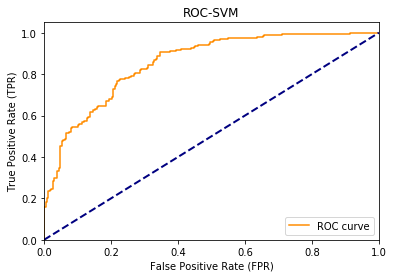

In [77]:
y_pred_svm = SVM.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test, y_pred_svm))

y_pred_proba_svm = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_svm)
auc = metrics.roc_auc_score(y_test, y_pred_proba_svm)


plt.plot(fpr,tpr, color='darkorange', label='ROC curve')
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-SVM')
plt.legend(loc="lower right")
plt.show()

# Random Forest

In [33]:

RF_C = RandomForestClassifier(n_estimators=100, n_jobs=-1)
RF_C.fit(X_train.iloc[:, feat_cols], y_train)

y_train_pred = RF_C.predict(X_train.iloc[:, feat_cols])
print('Training accuracy on selected features: %.3f' % acc(y_train, y_train_pred))

y_test_pred = RF_C.predict(X_test.iloc[:, feat_cols])
print('Testing accuracy on selected features: %.3f' % acc(y_test, y_test_pred))

Training accuracy on selected features: 1.000
Testing accuracy on selected features: 0.803


In [34]:
RF_C = RandomForestClassifier(n_estimators=100, n_jobs=-1)
RF_C.fit(X_train, y_train)

y_train_pred = RF_C.predict(X_train)
print('Training accuracy on selected features: %.3f' % acc(y_train, y_train_pred))

y_test_pred = RF_C.predict(X_test)
print('Testing accuracy on selected features: %.3f' % acc(y_test, y_test_pred))

Training accuracy on selected features: 1.000
Testing accuracy on selected features: 0.824


# The ROC and AUC for RF

Accuracy 0.8241525423728814


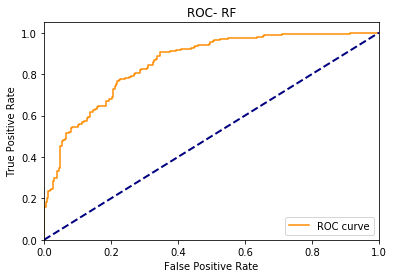

In [79]:

y_pred= RF_C.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)


plt.plot(fpr,tpr, color='darkorange', label='ROC curve')
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC- RF')
plt.legend(loc="lower right")
plt.show()